# TIM - TP1 : Opérations sur des images avec Python

Le but du TP est de commencer à étudier de vraies données avec Python.
Dans le cadre des travaux pratiques de ce cours, nous allons principalement utiliser 3 librairies Python : 
- NumPy, pour le calcul mathématique et la manipulation de matrices ;
- Matplotlib pour la visualisation graphique des données ;
- OpenCV (cv2) pour la manipulation et le traitement d'images.

Pour plus de détails sur Python, NumPy, Matplotlib et OpenCV, un grand nombre de ressources sont disponibles sur https://pythonprogramming.net/, y compris plusieurs séries de vidéos YouTube.

La documentation complète de Python 3 et des librairies qui seront utilisées sont disponibles ici :
- Python 3 : https://docs.python.org/fr/3/
- NumPy : https://docs.scipy.org/doc/numpy-1.15.0/reference/index.html
- Matplotlib : https://matplotlib.org/3.1.1/index.html
- OpenCV : https://docs.opencv.org/4.1.1/index.html (bon courage !)

## Ex. 0 : Démarrage

Python est un langage très complet et utilisé dans de nombreux domaines, du développement Web à la robotique.

Dans cette série de TP, nous l'utiliserons pour la vision informatique, le calcul mathématique et la science des données.

Commencez par télécharger les librairies manquantes via pip (gestionnaire de paquets de Python).

In [1]:
!pip install opencv-python
!pip install sklearn

Importez ensuite les librairies nécessaires:

In [2]:
%matplotlib inline

# Librairies Matplotlib, NumPy et OpenCV
import matplotlib.pyplot as plt
import numpy as np
import cv2 #OpenCV

# Librairies supplémentaires pour certaines parties du TP
from sklearn.cluster import MiniBatchKMeans

Et définissez le chemin d'accès à la base d'images (utilisée ultérieurement)

In [3]:
# A changer si le dossier ne se situe pas à cet endroit
path_base = 'Base_images//'

## Ex. 1 : Python et NumPy en quelques lignes

**1.**

Calculez $\log(\cos(1-(1+1)/2))$ et $\sqrt{-1}$ avec NumPy

In [4]:
np.log(np.cos(1 - (1 + 1)/2 ))

0.0

In [5]:
x = np.complex(-1,0)  # On crée le complexe -1 + 0j
np.sqrt(x)

1j

---
**2.**

Que font les instructions Python help et %whos

In [6]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [7]:
whos

Variable          Type                          Data/Info
---------------------------------------------------------
K                 module                        <module 'keras.backend' f<...>ras/backend/__init__.py'>
MiniBatchKMeans   type                          <class 'sklearn.cluster.k<...>_means_.MiniBatchKMeans'>
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
cv2               module                        <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
get_ipython       function                      <function get_ipython at 0x7f2cbbb76bf8>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
json              module                        <module 'json' from '/hom<...>hon3.6/json/__init__.py'>
np                module                        <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
path_base         str                           Base_images//
pd                module       

**_Réponse :_** 

---
**3.**

Créez une variable a à laquelle vous affecterez le résultat du calcul $2(3+ 2)$. Puis enlevez un à la valeur de la variable a.

In [8]:
a = 2*(3+2);
a = a-1
a

9

Vérifiez quelles sont les variables connues du notebook (et que a est bien connue et quelle a le type attendu)

In [9]:
whos

Variable          Type                          Data/Info
---------------------------------------------------------
K                 module                        <module 'keras.backend' f<...>ras/backend/__init__.py'>
MiniBatchKMeans   type                          <class 'sklearn.cluster.k<...>_means_.MiniBatchKMeans'>
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
a                 int                           9
cv2               module                        <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
get_ipython       function                      <function get_ipython at 0x7f2cbbb76bf8>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
json              module                        <module 'json' from '/hom<...>hon3.6/json/__init__.py'>
np                module                        <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
path_base         str                      

---
**4.**

D'un point de vue numérique, une image est tout simplement une matrice. Le traitement d'image s'apparente donc à l'application d'algorithmes sur des matrices. 

Créez la matrice
$A = \left[\begin{array}{lll}
1 & 2 & 3\\
4 & 5 & 6\\
−1 & 0 & 1\\
1 & 1 & 2
\end{array}\right]$

In [10]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [-1, 0, 1],
    [1, 1, 2]
])
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [-1,  0,  1],
       [ 1,  1,  2]])

Affichez la taille et les dimensions de la matrice A créée.

In [11]:
A.size

12

In [12]:
A.shape

(4, 3)

Affichez le nombre de dimensions de A.

In [13]:
A.ndim

2

Affichez la deuxième colonne de A.

In [14]:
A[:,1]

array([2, 5, 0, 1])

Créez un sous-tableau s composé des 2ème et 3ème lignes
de A.

In [15]:
s = A[1:3, :]
s

array([[ 4,  5,  6],
       [-1,  0,  1]])

---
**5.**

Affichez le type des élements de la matrice A.

In [16]:
A.dtype

dtype('int64')

Il est important dans le cadre de la manipulation de matrices de bien connaître le type des éléments que nous manipulons :
- Est-ce un naturel (uint), un entier (int), un réel (float), un booléen (bool), un complexe (complex) ?
- En combien de bits l'élement est codé ? (8, 16, 32, 64)

Vous trouverez ci-dessous les types de données disponibles sous NumPy.

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

Un exemple concret de mauvaise manipulation de matrice :

In [17]:
B = np.full((2,2), 255, dtype = np.uint16)
C = np.full((2,2), 255, dtype = np.uint8)
print("B : \n"+str(B)+"\n")
print("C : \n"+str(C)+"\n")

B : 
[[255 255]
 [255 255]]

C : 
[[255 255]
 [255 255]]



In [18]:
print("B+1 : \n"+str(B+1)+"\n")

B+1 : 
[[256 256]
 [256 256]]



In [19]:
print("C+1 \n: "+str(C+1)+"\n")

C+1 
: [[0 0]
 [0 0]]



Pour quelle(s) raison(s) avons-nous obtenu ces résultats précédents ?

**_Réponse :_**

---
**6.**

Pour gérer des fichiers, on utilisera la bibliothèque os:

In [20]:
import os
os.path.abspath(os.curdir)

'/home/robin/Bureau/TP TIM 2019-2020'

In [21]:
os.listdir()

['.ipynb_checkpoints', 'TP1.ipynb', 'TP1_correction.ipynb', 'Base_images']

## Ex. 2 : Lecture et visualisation des images avec OpenCV

OpenCV est capable de lire et de décoder les fichiers images BMP, JPEG, PNG, WEBP, PBM, PGM, PPM, SR, RAS et TIFF. Comme expliqué précédemment, une image est représentée sous forme d'une matrice. Avant de traiter une image avec OpenCV, il faut la lire et décoder son format afin de la transformer en une matrice de valeurs.

**1.**

Lisez l'image *lena_gray.tif*, dans le dossier *base_images*, et stockez-la dans la variable *img*.

In [22]:
img = cv2.imread(path_base+'lena_gray.tif',-1) 
# Le 2ème argument désigne le type de couleur de l'image 
#   0 pour la charger en niveaux de gris
#   1 pour la charger en couleur
#   -1 pour la charger telle qu'elle est

Affichez l'image sur une figure

In [23]:
rows,cols = img.shape
img_dtype = img.dtype

Récuperez quelques infos utiles de notre image.

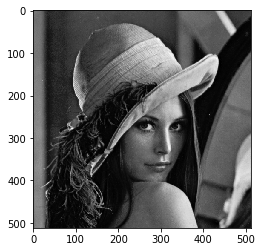

In [24]:
plt.imshow(img,'gray')

---
**2.**

Chaque élement de la matrice correspond donc à un pixel de l'image. Dans le cas de notre matrice *img* en niveaux de gris, chaque pixel à la position *(i,j)* contient donc une seule valeur **_I_** *(i,j)*, qui est le niveau de gris au point *(i,j)* (*i* : numéro de ligne, *j* : numéro de colonne). 

Récupérez le niveau de gris du pixel *(50,100)*.

In [25]:
img[50,100]

53

Récupérez le quart haut droit de l'image *lena_gray.tif* et affichez le résultat.

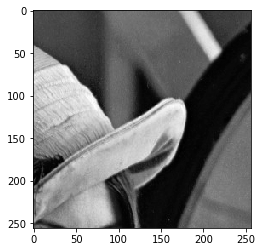

In [26]:
# A compléter
# Récupérez le quart haut droit d'img
sub_img = img[0:rows//2,cols//2:]
# Affichez le résultat
plt.imshow(sub_img,'gray')

---
**3.**

Transposez la variable *img* avec la fonction *transpose* de NumPy, et affichez le résultat en niveaux de gris.

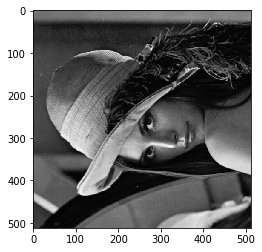

In [27]:
# A compléter
plt.imshow(np.transpose(img),'gray')

Réalisez une rotation de 90° à *img* avec les fonctions d'OpenCV :
- *getRotationMatrix2D* pour obtenir la matrice de rotation de 90° pour l'image *img* ;
- *warpAffine* pour appliquer la rotation à *img* avec la matrice de rotation calculée.

Affichez le résultat obtenu en niveaux de gris.

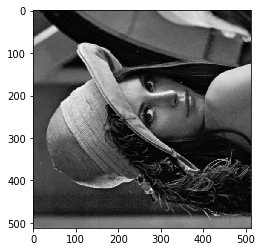

In [28]:
# A compléter
# Calcul de la matrice de rotation
rot = cv2.getRotationMatrix2D((rows//2,cols//2),90,1)
# Rotation de l'image avec la matrice de rotation et affichage du résultat
plt.imshow(cv2.warpAffine(img,rot,(cols,rows)),'gray')

Que remarquez-vous ?

**_Réponse :_**

---
## Ex 3. Création et visualisation des images

**1.**

Créez une matrice *_M_* de taille *_N x N_* avec *N = 256* dont le terme général est **_I_** *(i,j) = j*, puis affichez la en niveaux de gris.



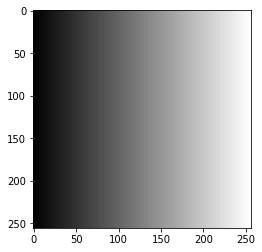

In [29]:
# A compléter
# Création de la matrice M
M = np.tile(np.arange(0,256),(256,1))
# Affichage de la matrice M en niveaux de gris
plt.imshow(M,'gray')

---
**2.**

Pour l'instant, nous avons uniquement affiché nos images en niveaux de gris (*'gray'*), mais il est possible d'utiliser des palettes différentes. 

La liste des palettes disponibles sur Matplotlib est à ce lien : https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html.

Affichez la matrice M avec une palette de couleurs (autre que niveaux de gris)

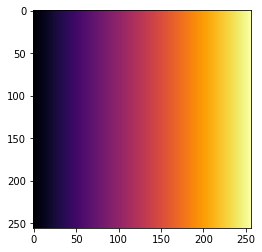

In [30]:
# A compléter
plt.imshow(M,'inferno')

---
**3.**

Il est également possible de créer sa propre palette et de l'appliquer sur une image.

Pour cela, on va créer une instance *colormap* de la classe *ListedColormap*, qui contiendra la matrice *colors*. Cette matrice sera de taille *(N,4)*, où N est un naturel de votre choix. Les 3 premières colonnes (RGB) contiendront des réels entre 0 et 1, et la dernière colonne (A pour la transparence) sera un vecteur rempli de 1, de longueur *N*.

Créez la matrice *colors*.

In [83]:
# A compléter
N = 25
colors = np.concatenate([np.random.rand(N,3),np.ones((N,1))],axis=1)
# Vérification de la taille de la matrice colors
assert colors.shape == (N,4), 'la taille de la matrice doit être (N, 4), N = '+str(N)+' , colors.shape = '+str(colors.shape)

AssertionError: la taille de la matrice doit être (N,4), N = 25 , colors.shape = (25, 4)

In [85]:
# Création de la colormap
from matplotlib.colors import ListedColormap
colormap = ListedColormap(colors)

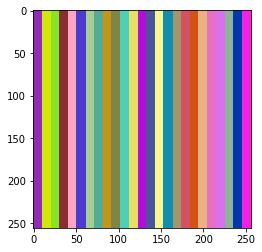

In [86]:
# A compléter
# Affichage de la matrice M avec la palette créée
plt.imshow(M,colormap)

--- 
## Ex. 4 : Calculs sur les images ###

Pour cette partie, passons à la couleur en étudiant l'image lena_color.tif. 

**1.**

Commencez d'abord par la charger et stockez la dans la variable img_color. 

In [87]:
# A compléter
# Chargement de l'image lena_color.tif
img_color = cv2.imread(path_base+"lena_color.tif",-1)

Affichez le nombre de dimensions de l'image chargée.

In [88]:
# A compléter
print(img_color.ndim)

3


---
**2.**

Affichez les dimensions de l'image.

In [89]:
# A compléter
print(img_color.shape)

(512, 512, 3)


Vous pouvez voir que l'image couleur chargée possède 3 channels : un channel bleu, un channel vert et un channel rouge. Le format de l'image est BGR (Blue, Green, Red). Affichez les composantes bleue, verte et rouge de l'image.

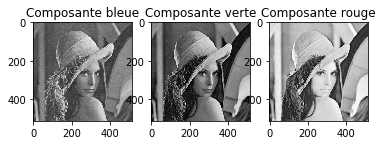

In [90]:
# A compléter
plt.subplot(1,3,1)
plt.imshow(img_color[:,:,0],'gray')
plt.title("Composante bleue")
plt.subplot(1,3,2)
plt.imshow(img_color[:,:,1],'gray')
plt.title("Composante verte")
plt.subplot(1,3,3)
plt.imshow(img_color[:,:,2],'gray')
plt.title("Composante rouge")
plt.show()

Pour des raisons pratiques (manipulation avec Matplotlib notamment), convertissez l'image BGR en format RGB avec la fonction cv2.cvtColor avec cv2.COLOR_BGR2RB en paramètre :

        img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

In [91]:
# A compléter
# Conversion de l'image de BGR en RGB
img_color_rgb = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

Affichez l'image RGB.

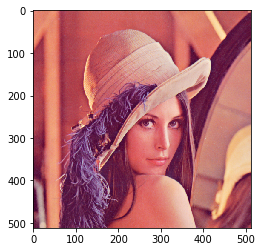

In [92]:
# A compléter
# Affichage de img_color en couleur
plt.imshow(img_color_rgb)

---
**3.**

Convertissez l'image couleur RGB *img_color_rgb* en niveaux de gris :
- En utilisant la fonction cvtColor d'OpenCV
- En la calculant manuellement avec la formule *$I_{gray}$ = $\alpha$R + $\beta$G + $\gamma$B* sachant que *$\alpha$ = 0.2989*, *$\beta$ = 0.5870* et *$\gamma$ = 0.1140* 

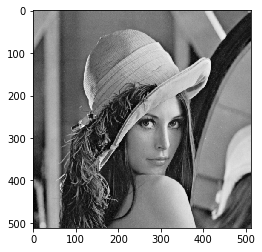

In [93]:
# A compléter
# Conversion en niveaux de gris avec cvtColor
img_gray_1 = cv2.cvtColor(img_color_rgb,cv2.COLOR_RGB2GRAY)
# Affichage de l'image en niveaux de gris
plt.imshow(img_gray_1,'gray')

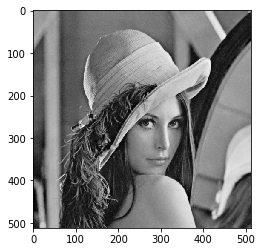

In [94]:
# A compléter
# Conversion manuelle en niveaux de gris
alpha = 0.2989
beta = 0.5870
gamma = 0.1140
img_gray_2 = img_color_rgb[:,:,0]*alpha + img_color_rgb[:,:,1]*beta + img_color_rgb[:,:,2]*gamma
# Affichage de l'image en niveaux de gris
plt.imshow(img_gray_2,'gray')

Comparez les résultats :
- Au niveau des matrices elles-mêmes ;
- Au niveau visuel

**_Réponse :_**

---
## Ex. 5 : Quantification

**1.**

Pour cette partie, nous allons réutiliser l'image lena_gray.tif. Chargez cette dernière.

In [95]:
# A compléter
lena_gray = cv2.imread(path_base+'lena_gray.tif',-1)

Comme on est gentil, on vous passe la fonction imquantize (équivalent de la fonction Matlab).
imquantize prend en entrée :
- img : l'image à quantifier ;
- n_clusters : le pas de quantification.

imquantize retourne en sortie quant, l'image img quantifiée.

In [96]:
def imquantize(img,n_clusters):
    if img.ndim == 2:
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    (h, w) = img.shape[:2]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    
    # apply k-means using the specified number of clusters and
    # then create the quantized image based on the predictions
    clt = MiniBatchKMeans(n_clusters)
    labels = clt.fit_predict(img)
    quant = clt.cluster_centers_.astype("uint8")[labels]
     
    # reshape the feature vectors to images
    quant = quant.reshape((h, w, 3))
 
    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)

    return quant

On désire déterminer l'influence d'une quantification à pas variables.

Changez le pas de quantification de l'image pour obtenir 128, 64, 32, 16, 8, 4 et 2 niveaux de gris.

In [97]:
# A compléter
# Pas de quantification stockés dans une liste
n_clusters = [128,64,32,16,8,4,2]
# Construction de la liste des images quantifiées correspondantes à chaque pas de quantification 
lena_quants = [imquantize(lena_gray,n_cluster) for n_cluster in n_clusters]

Affichez les images quantifiées correspondantes à chaque pas de quantification afin de déterminer le seuil minimal de quantification à partir duquel certains faux contours apparaissent.

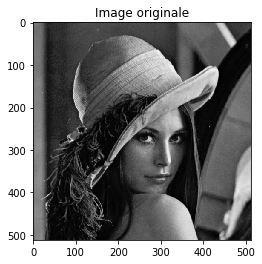

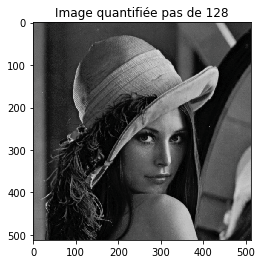

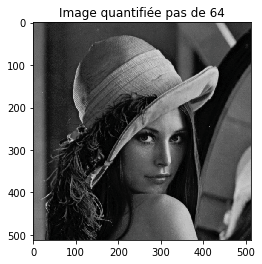

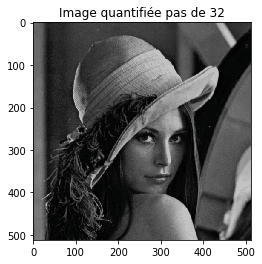

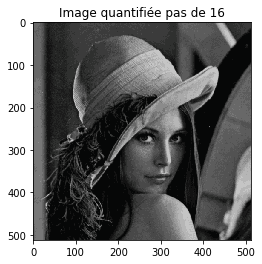

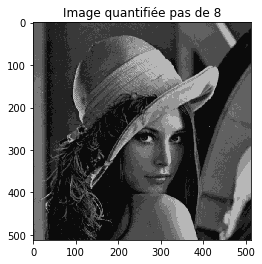

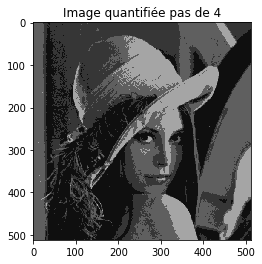

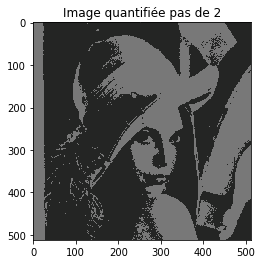

In [98]:
# A compléter
# Affichage de l'image originale et des images quantifiées
plt.imshow(lena_gray,'gray')
plt.title('Image originale')
plt.show()
for i in range(len(n_clusters)):
    plt.imshow(lena_quants[i],'gray')
    plt.title('Image quantifiée pas de '+str(n_clusters[i]))
    plt.show()

Affichez l'histogramme de l'image originale et des images quantifiées grâce à la fonction hist de Matplotlib.

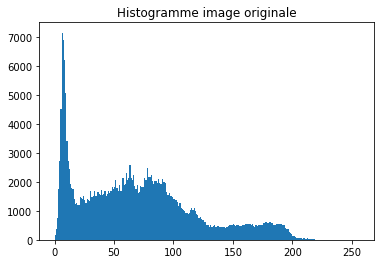

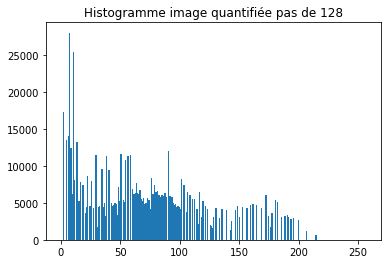

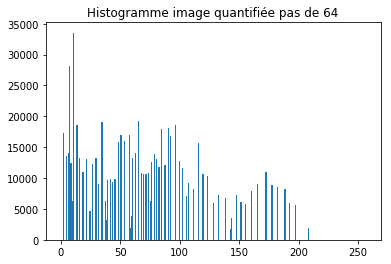

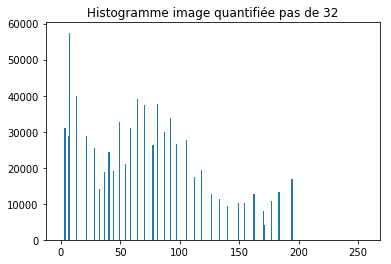

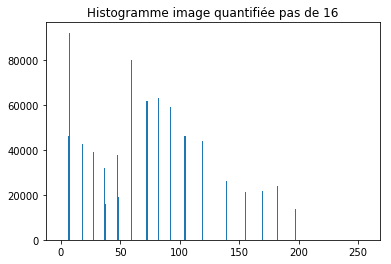

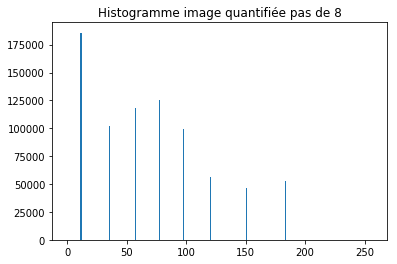

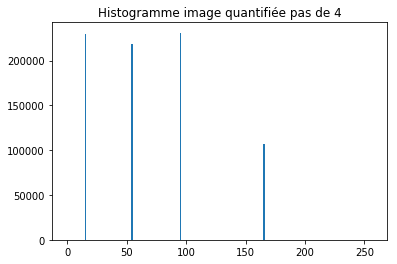

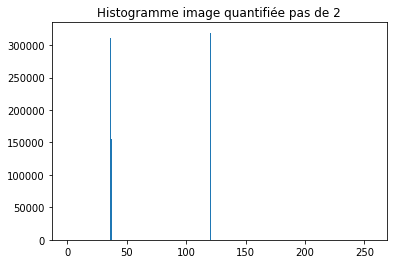

In [99]:
# A compléter
# Affichage des histogrammes de l'image originale et des images quantifiées
plt.hist(lena_gray.ravel(),256,[0,256]);
plt.title('Histogramme image originale')
plt.show()
for i in range(len(n_clusters)):
    plt.hist(lena_quants[i].ravel(),256,[0,256])
    plt.title('Histogramme image quantifiée pas de '+str(n_clusters[i]))
    plt.show()

---
**2.**

Passons maintenant à l'image couleur *cameleon.tif*

Commencez par charger l'image en niveaux de gris et affichez-la.

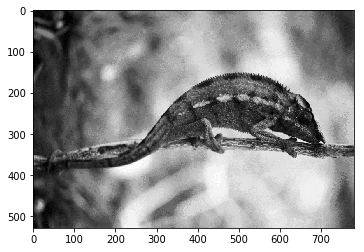

In [100]:
cameleon = cv2.imread(path_base+'cameleon.tif',0)
plt.imshow(cameleon,'gray')

Changez le pas de quantification de l'image pour obtenir 128, 64, 32, 16, 8, 4 et 2 niveaux de gris.

In [102]:
# A compléter
# Pas de quantification stockés dans une liste
n_clusters = [128,64,32,16,8,4,2]
# Construction de la liste des images quantifiées correspondantes à chaque pas de quantification 
cameleon_quants = [imquantize(cameleon,n_cluster) for n_cluster in n_clusters]

Affichez les images quantifiées correspondantes à chaque pas de quantification afin de déterminer le seuil minimal de quantification à partir duquel certains faux contours apparaissent.

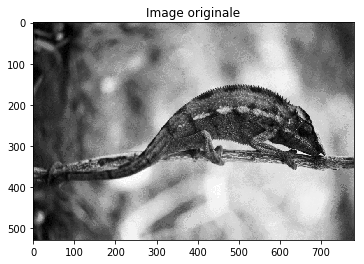

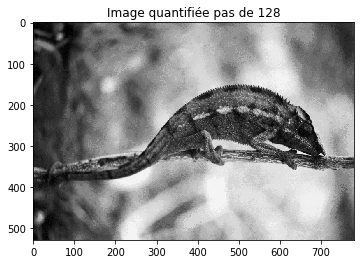

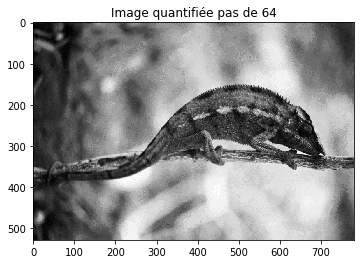

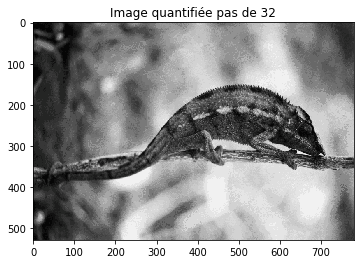

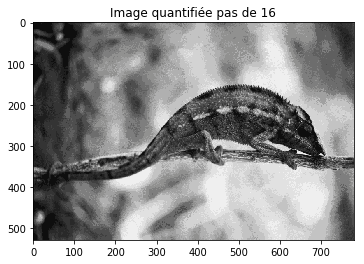

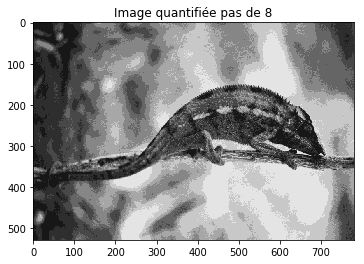

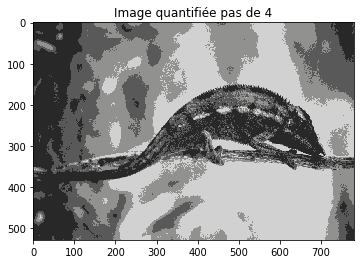

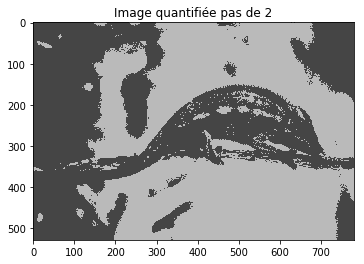

In [103]:
# A compléter
# Affichage de l'image originale et des images quantifiées
plt.imshow(cameleon,'gray')
plt.title('Image originale')
plt.show()
for i in range(len(n_clusters)):
    plt.imshow(cameleon_quants[i],'gray')
    plt.title('Image quantifiée pas de '+str(n_clusters[i]))
    plt.show()

Affichez l'histogramme de l'image originale et des images quantifiées grâce à la fonction hist de Matplotlib.

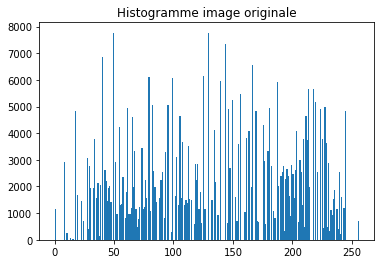

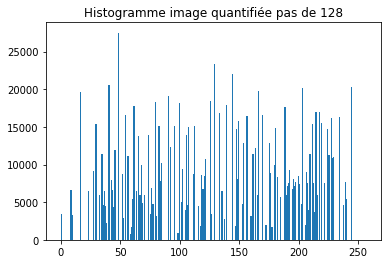

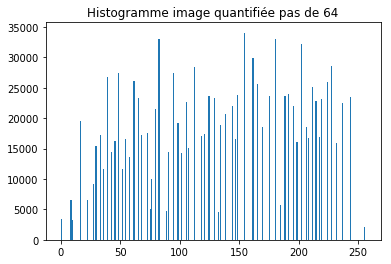

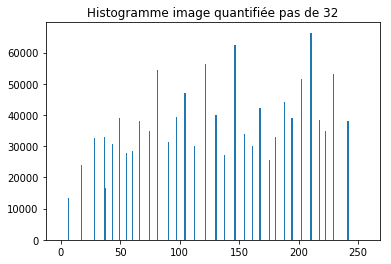

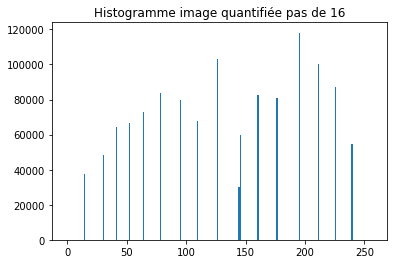

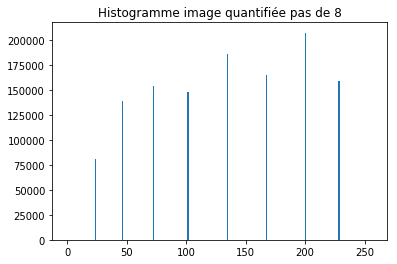

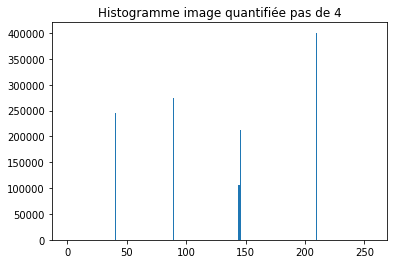

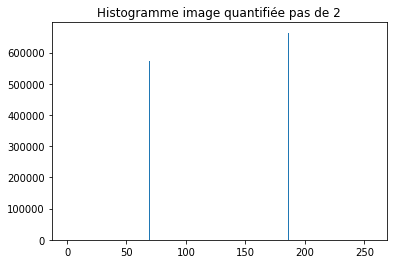

In [104]:
# A compléter
# Affichage des histogrammes de l'image originale et des images quantifiées
plt.hist(cameleon.ravel(),256,[0,256]);
plt.title('Histogramme image originale')
plt.show()
for i in range(len(n_clusters)):
    plt.hist(cameleon_quants[i].ravel(),256,[0,256])
    plt.title('Histogramme image quantifiée pas de '+str(n_clusters[i]))
    plt.show()

Conclure.

**_Réponse :_**

## Ex 6. : Re-échantillonnage

**1.**

Chargez l'image *mire.png* en niveaux de gris et affichez-la.

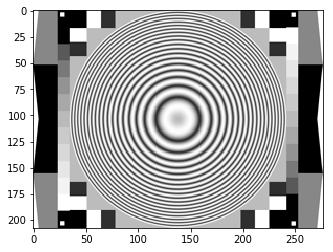

In [105]:
# A compléter
# Chargerment de l'image
mire = cv2.imread(path_base+'mire.png',0)
# Affichage de l'image
plt.imshow(mire,'gray')

Créez une version sous-échantillonnée par un facteur 2 de cette image à l'aide d'une fonction que vous écrirez. Pour cela, créez une nouvelle image en ne prenant qu'un pixel sur deux dans l'image originale. (Opération à réaliser sur les lignes et les colonnes de l'image de départ).

In [106]:
# A compléter
# Fonction de sous-échantillonage
def subsampling(img,factor):
    (height,width) = img.shape
    new_img = np.empty((height//factor+1,width//factor+1),dtype = img.dtype)
    for h in range(height):
        for w in range(width):
            if (h%factor==0) and (w%factor==0):
                new_img[h//factor,w//factor] = img[h,w]
    return new_img

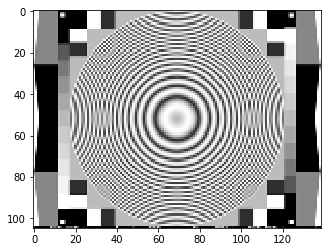

In [107]:
# A compléter
# Affichage de l'image sous échantillonnée avec un facteur 2
subsampled_img = subsampling(mire,2)
plt.imshow(subsampled_img,'gray')

---
**2.**

Créez la même fonction sans boucle grâce à l'indexation des tableaux NumPy.

In [108]:
# A compléter
# Fonction de sous échantillonage sans boucle
def subsampling2(img,factor):
    return img[::factor,::factor]

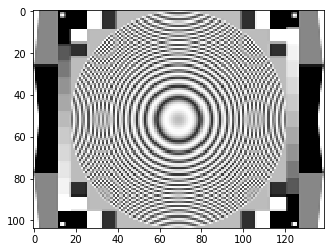

In [109]:
# A compléter
# Affichage de l'image sous échantillonnée avec un facteur 2
subsampled_img_2 = subsampling2(mire,2)
plt.imshow(subsampled_img_2,'gray')

Décrivez les effets du sous-échantillonnage.

**_Réponse :_**

---
**3.**

Refaites le sous-échantillonnage de la même image mais avec un facteur 4 (avec les 2 fonctions que vous avez implémenté).

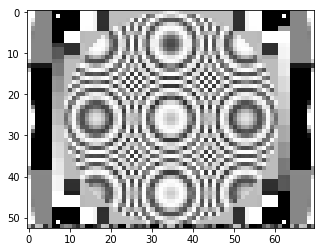

In [110]:
# A compléter
# Affichage de l'image sous échantillonnée avec un facteur 4 (fonction avec boucle)
subsampled_img = subsampling(mire,4)
plt.imshow(subsampled_img,'gray')

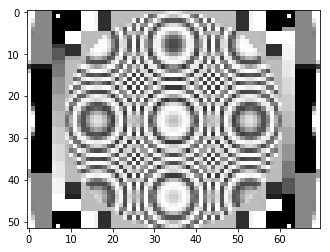

In [111]:
# A compléter
# Affichage de l'image sous échantillonnée avec un facteur 4 (fonction sans boucle)
subsampled_img_2 = subsampling2(mire,4)
plt.imshow(subsampled_img_2,'gray')

Décrivez les effets du sous-échantillonnage.

**_Réponse :_**

## Rendu de TP
Le rendu qui vous est demandé pour les TP de M8 est la version HTML de ce notebook. Pour l'obtenir: Fichier, télécharger au format, HTML (.html).